# `panning-extended` demonstration

In [1]:
import nbseq
import os

# change working directory to `./panning-extended` for simplicity of access to feature tables, etc
os.chdir('../../')

## Load data into `nbseq.Experiment`

Load experiment sample metadata, feature tables, and sequences

In [13]:
ex = nbseq.Experiment.from_files(
    # CDR3 sequences are gzipped, so use non-default path
    fd_cdr3='results/tables/cdr3/asvs.csv',
    metadata='config/metadata_full.csv'
    # phenotypes='config/phenotypes.csv'
) 

Loading experiment panning-extended from '/vast/palmer/home.mccleary/cng2/code/phageseq-paper/panning-extended'...
- Reading metadata from config/metadata_full.csv ...
- Reading phenotypes from config/phenotypes.csv ...
- Reading Config from config/config.yaml ...
- Using SQL database at 'sqlite:////vast/palmer/home.mccleary/cng2/code/phageseq-paper/panning-extended/intermediate/aa/asvs.db'
- Reading feature data for table 'cdr3' from results/tables/cdr3/asvs.csv (2.6 MB)...
- Reading aa feature table from results/tables/aa/feature_table.biom (350.4 MB)...
- Reading cdr3 feature table from results/tables/cdr3/feature_table.biom (8.4 MB)...
- Warning: phylogeny for space 'aa' at 'intermediate/aa/features/top_asvs/alpaca/asvs.nwk' does not exist!
- Warning: phylogeny for space 'cdr3' at 'intermediate/cdr3/features/top_asvs/alpaca/asvs.nwk' does not exist!
- Using mmseqs2 database 'aa' at 'intermediate/aa/features_db/features'
- Warning: mmseqs2 database for space 'cdr3' at 'intermediate/

In [3]:
ex

Experiment('panning-extended') with feature spaces ['aa', 'cdr3']:
  obs: ['plate.x' 'well.x' 'depth' 'expt' 'round' 'sample' 'phage_library'
    'notes' 'r' 'io' 'kind' 'selection' 'replicate' 'name_full' 'name'
    'well_027e' 'sel_plate_027i' 'sel_well_027i' 'selection_027j' 'plate.y'
    'well.y' 'category' 'antigen' 'genotype_pair' 'gene_CS' 'gene_S'
    'genotype_CS' 'background_CS' 'strain_CS' 'loc_CS' 'cond_CS' 'genotype_S'
    'background_S' 'strain_S' 'loc_S' 'cond_S' 'cond_notes' 'bflm' 'swim'
    'twitch' 'swarm' 'PMB-R' 'FEP-R' 'TET-R' 'CIP-R' 'CHL-R' 'GEN-R' 'ERY-R'
    'IPM-R' 'cdiGMP' 'FliC' 'FliCa' 'FliCb' 'FlgEHKL' 'PilQ' 'PilA' 'PilB'
    'LasA' 'LasB' 'Apr' 'XcpQ' 'ToxA' 'EstA' 'LepA' 'PlpD' 'Phz' 'Pcn' 'Pvd'
    'Hcn' 'Rhl' 'T3SS' 'T6SS' 'Pel' 'Psl' 'CdrB' 'SCV' 'Mucoid' 'Alginate'
    'OprM' 'OprJ' 'OprN' 'OprOP' 'OpdH' 'OprD' 'OprL' 'OprF' 'OprG' 'OprH'
    'OprB' 'MexAB' 'MexCD' 'MexEF' 'MexJK' 'MexXY' 'MexGHI' 'PirA' 'Pfu'  'TonB'
    'FptA' 'FpvA' 'PfeA' 'CupB

An `Experiment` is a collection of **feature tables** in different **feature spaces** (e.g. amino acid, `aa`; CDR3, `cdr3`; etc.). Each feature table is stored in [AnnData](https://anndata.readthedocs.io) format. The **sample metadata** (`obs`) is shared among the feature spaces, whereas each space has its own **feature metadata** (`var`). You can access the feature tables within ex.fts:

In [4]:
ex.fts.cdr3

AnnData object with n_obs × n_vars = 439 × 40292
    obs: 'plate.x', 'well.x', 'depth', 'expt', 'round', 'sample', 'phage_library', 'notes', 'r', 'io', 'kind', 'selection', 'replicate', 'name_full', 'name', 'well_027e', 'sel_plate_027i', 'sel_well_027i', 'selection_027j', 'plate.y', 'well.y', 'category', 'antigen', 'genotype_pair', 'gene_CS', 'gene_S', 'genotype_CS', 'background_CS', 'strain_CS', 'loc_CS', 'cond_CS', 'genotype_S', 'background_S', 'strain_S', 'loc_S', 'cond_S', 'cond_notes', 'bflm', 'swim', 'twitch', 'swarm', 'PMB-R', 'FEP-R', 'TET-R', 'CIP-R', 'CHL-R', 'GEN-R', 'ERY-R', 'IPM-R', 'cdiGMP', 'FliC', 'FliCa', 'FliCb', 'FlgEHKL', 'PilQ', 'PilA', 'PilB', 'LasA', 'LasB', 'Apr', 'XcpQ', 'ToxA', 'EstA', 'LepA', 'PlpD', 'Phz', 'Pcn', 'Pvd', 'Hcn', 'Rhl', 'T3SS', 'T6SS', 'Pel', 'Psl', 'CdrB', 'SCV', 'Mucoid', 'Alginate', 'OprM', 'OprJ', 'OprN', 'OprOP', 'OpdH', 'OprD', 'OprL', 'OprF', 'OprG', 'OprH', 'OprB', 'MexAB', 'MexCD', 'MexEF', 'MexJK', 'MexXY', 'MexGHI', 'PirA', 'Pfu', 'T

View a summary of all **selections** in the experiment and the columns of metadata:

In [5]:
ex.summarize_selections()

expt phage_library    selection  replicate  \
name                                                                  
024f.PAO1_efflux-.1      024f        Alpaca  PAO1_efflux          1   
024f.PAO1_efflux-.2      024f        Alpaca  PAO1_efflux          2   
024f.PAO1_efflux.1       024f        Alpaca  PAO1_efflux          1   
024f.PAO1_efflux.2       024f        Alpaca  PAO1_efflux          2   
024f.PAO1_efflux.3       024f        Alpaca  PAO1_efflux          3   
...                       ...           ...          ...        ...   
027j.lib.P2.5        027j.lib        Alpaca           P2          5   
027j.lib.P2.6        027j.lib        Alpaca           P2          6   
027j.lib.P2.7        027j.lib        Alpaca           P2          7   
027j.lib.P2.8        027j.lib        Alpaca           P2          8   
027j.lib.P2.9        027j.lib        Alpaca           P2          9   

                    description  samples rounds antigens                notes  
name                                                                           
024f.PAO1_efflux-.1     NA / NA        1    R1o                        eluent  
024f.PAO1_efflux-.2     NA / NA        1    R1o                          None  
024f.PAO1_efflux.1      NA / NA        1    R2i           W0 supernatant (FS)  
024f.PAO1_efflux.2      NA / NA        1    R2i           W0 supernatant (FS)  
024f.PAO1_efflux.3      NA / NA        1    R2i           W0 supernatant (FS)  
...                         ...      ...    ...      ...                  ...  
027j.lib.P2.5           NA / NA        1    R1i                          None  
027j.lib.P2.6           NA / NA        1    R1i                          None  
027j.lib.P2.7           NA / NA        1    R1i                          None  
027j.lib.P2.8           NA / NA        1    R1i                          None  
027j.lib.P2.9           NA / NA        1    R1i                          None  

[165 rows x 9 columns]

- Antigens: ['Alginate', 'Apr', 'CdrB', 'CupA', 'CupB', 'CupB5',
   'CupC', 'CupD', 'EstA', 'FlgEHKL', 'FliC', 'FliCa', 'FliCb',
   'FptA', 'FpvA', 'Hcn', 'L-LipidA-Ara4N', 'LPS', 'LPS-CPA',
   'LPS-LipidA-Palmitoyl', 'LPS-OSA', 'LPS-galU', 'LPS-rough', 'LasA',
   'LasB', 'LepA', 'MexAB', 'MexCD', 'MexEF', 'MexGHI', 'MexJK',
   'MexXY', 'OpdH', 'OprB', 'OprD', 'OprF', 'OprG', 'OprH', 'OprJ',
   'OprL', 'OprM', 'OprN', 'OprOP', 'Pcn', 'Pel', 'PfeA', 'Pfu',
   'Phz', 'PilA', 'PilB', 'PilQ', 'PirA', 'PlpD', 'Psl', 'Pvd', 'Rhl',
   'T3SS', 'T6SS', 'TonB', 'ToxA', 'XcpQ']
- Other phenotypes: ['CHL-R', 'CIP-R', 'ERY-R', 'FEP-R', 'GEN-R',
   'IPM-R', 'Mucoid', 'PMB-R', 'SCV', 'TET-R', 'bflm', 'cdiGMP',
   'swarm', 'swim', 'twitch']
- Other columns: ['kind', 'io', 'rs', 'replicates', 'plate.x',
   'well.x', 'depth', 'name_full', 'well_027e', 'sel_plate_027i',
   'sel_well_027i', 'selection_027j', 'plate.y', 'well.y', 'category',
   'antigen', 'genotype_pair', 'gene_CS', 'gene_S', 'genotype_CS'

Samples in the feature table may be separated into several sub-experiments (indicated by the `expt` column in `obs`); this is useful if multiple panning campaigns were conducted with different conditions.

In this case, several selections from the final round of the high-throughput panning experiment (expt `027i`) were re-sequenced, in addition to the main extended panning experiment (expt `027j`). `024f` is an unrelated experiment. `027j.lib` contains the un-panned input library (e.g. the round 1 input phage) and was used to build the null enrichment model.

Subsets of the feature tables can be extracted using `ex.query` or `nbseq.ft.query`:

In [6]:
# ex._expt_metadata = nbseq.utils.sample_metadata_to_expt_metadata(ex.obs)
ex.summarize_expts()

4 sub-experiment(s):
- 027i                : 15       selections, 1            rounds per selection (R5i), using libraries Alpaca
- 027j                : 118      selections, 1 - 4        rounds per selection (R5i,R5o,R6i,R6o,R7i,R7o,R8i), using libraries Alpaca
- 024f                : 23       selections, 1            rounds per selection (R1i,R1o,R2i), using libraries Alpaca
- 027j.lib            : 9        selections, 1            rounds per selection (R1i), using libraries Alpaca


## Ordination

In [7]:
import nbseq.ordination
import nbseq.viz.ord
import nbseq.ft

import matplotlib.pyplot as plt

In [8]:
# read scran-normalized feature table
ft_cdr3_scran = nbseq.ft.query(
    # only consider the extended panning experiment and the input library
    nbseq.ft.read('results/tables/cdr3/transformed/scran/feature_table.biom', metadata=ex.obs),
    "expt == '027j' | expt == '027j.lib'",
    axis='sample'
)

# ordinate by truncated SVD with 100 components
ord_skl, ord_skbio = nbseq.ordination.ordinate(ft_cdr3_scran, method='TSVD', **{ 'n_components':100 })

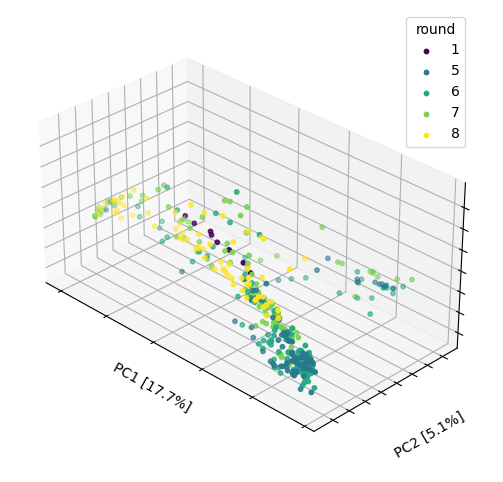

In [9]:
# plot ordination
rs = sorted(ex.obs['r'].unique())
nbseq.viz.ord.ordination_mpl(
    ord_skbio, ex.fts.cdr3.obs, 
    s=10,
    color='r', color_order=rs,
    cmap=nbseq.viz.ord.discrete_cmap(len(rs),'viridis'),                      
    camera=dict(elev=30, azim=-45, roll=0), 
    fig_kw = dict(figsize=(8,6)))
plt.legend(title="round")

## Interactive dashboards

`nbseq` provides interactive "dashboard" visualizations using the [Panel](https://panel.holoviz.org) and [Altair](https://altair-viz.github.io) libraries.

In [10]:
import nbseq.viz
import nbseq.viz.syntax
import nbseq.viz.dash

# load styles to view collapsible accordions and color-coded amino acid and nucleic acid strings in the notebook
nbseq.viz.setup_accordion()
nbseq.viz.syntax.aa_highlighter.setup_notebook()
nbseq.viz.syntax.na_highlighter.setup_notebook()

# import libraries for interactive visualization
import altair as alt
alt.data_transformers.enable("default")
alt.data_transformers.disable_max_rows()

import panel as pn
pn.extension('tabulator','vega')

The `selection_group_dashboard` allows one group of selections (e.g. those that are positive for a given antigen) to be compared against another group of selections. 

Here we look at the selections that are FlgEKHL (flagellar hook-basal body)+, versus all other selections. 

/gpfs/gibbs/project/kazmierczak/cng2/conda_envs/nbseq_full_dev/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
/gpfs/gibbs/project/kazmierczak/cng2/conda_envs/nbseq_full_dev/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
/gpfs/gibbs/project/kazmierczak/cng2/conda_envs/nbseq_full_dev/lib/python3.10/site-packages/nbseq/utils.py:1185: RuntimeWarning: invalid value encountered in divide
/gpfs/gibbs/project/kazmierczak/cng2/conda_envs/nbseq_full_dev/lib/python3.10/site-packages/nbseq/utils.py:1172: RuntimeWarning: invalid value encountered in divide
/gpfs/gibbs/project/kazmierczak/cng2/conda_envs/nbseq_full_dev/lib/python3.10/site-packages/nbseq/ft.py:987: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
/gpfs/gibbs/project/kazmierczak/cng2/conda_envs/nbseq_full_dev/lib/python3.10/site-packages/nbseq/select/__init__

Column(sizing_mode='stretch_width')
    [0] Row(sizing_mode='stretch_width')
        [0] TextInput(name='global_query', placeholder='Filter entire dataset', value="expt == '027j' &...)
        [1] Select(name='space', options=['cdr3', 'aa'], value='cdr3')
    [1] ParamFunction(function, _pane=Column, defer_load=False, loading_indicator=True)
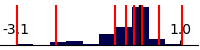
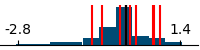
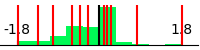
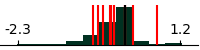
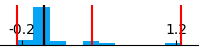
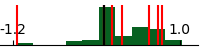
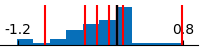
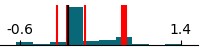
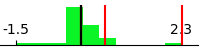
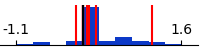
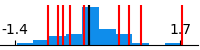
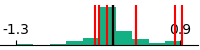
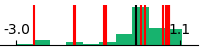
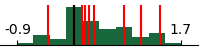
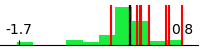
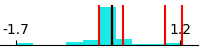
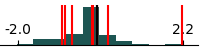
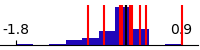
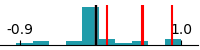
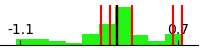
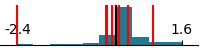
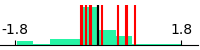
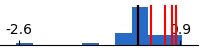
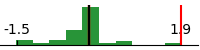
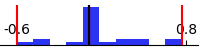
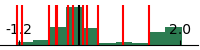
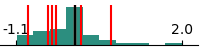
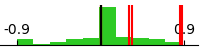
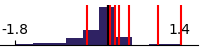
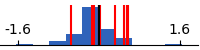
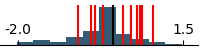
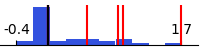
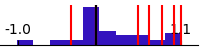
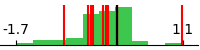
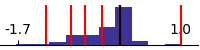
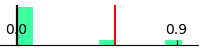
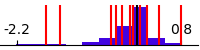
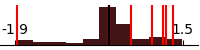
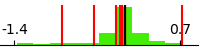
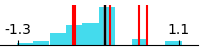
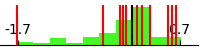
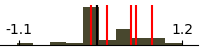
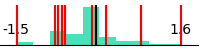
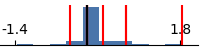
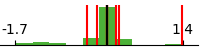
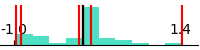
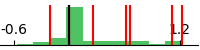
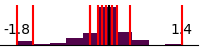
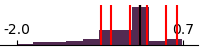
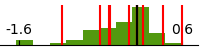
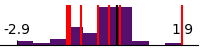
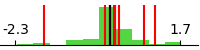
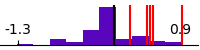
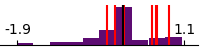
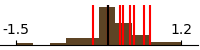
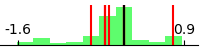
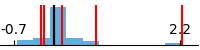
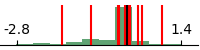
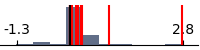
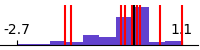
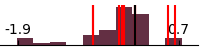
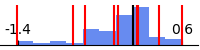
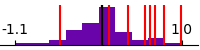
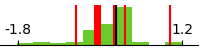
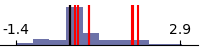
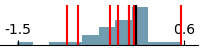
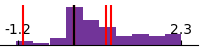
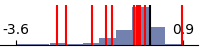
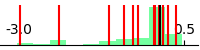
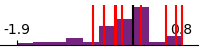
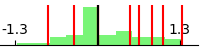
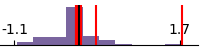
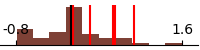
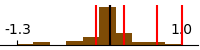
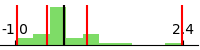
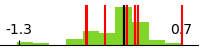
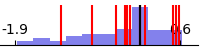
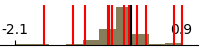
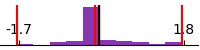
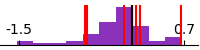
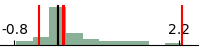
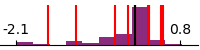
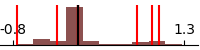
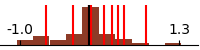
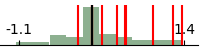
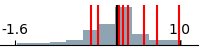
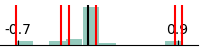
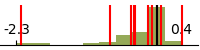
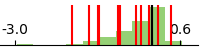
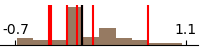
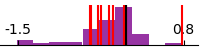
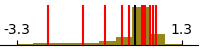
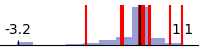
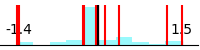
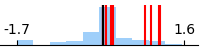
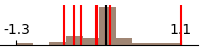
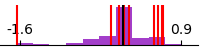
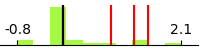
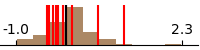
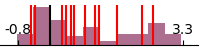
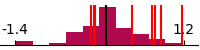
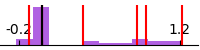
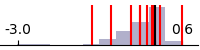
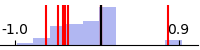
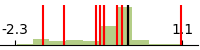
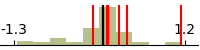
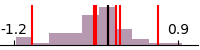
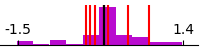
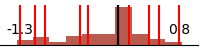
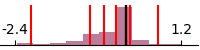
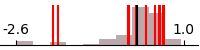
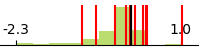
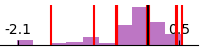
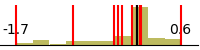
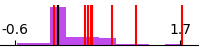
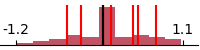
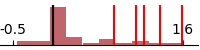
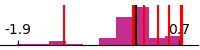
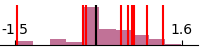
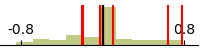
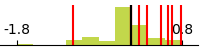
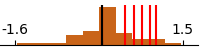
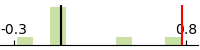
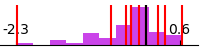
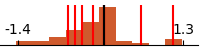
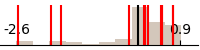
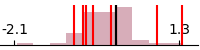
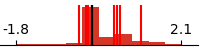
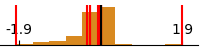
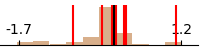
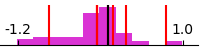
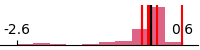
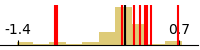
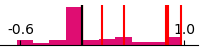
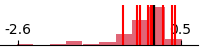
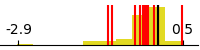
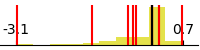
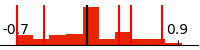
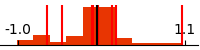
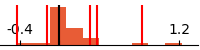
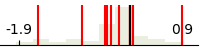
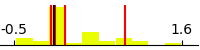
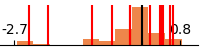
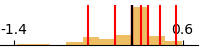
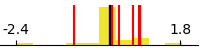
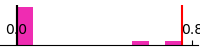
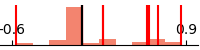
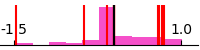
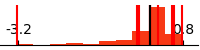
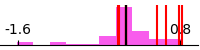
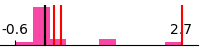
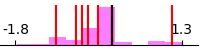
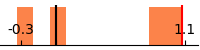
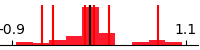
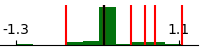
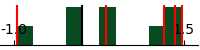
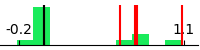
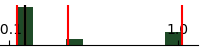
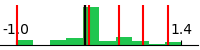
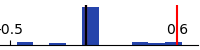
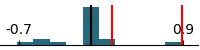
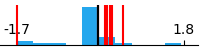
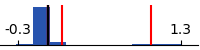
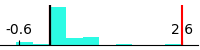
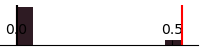
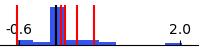
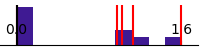
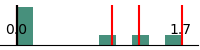
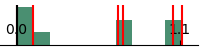
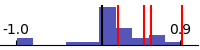
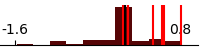
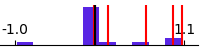
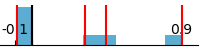
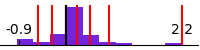
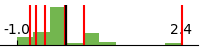
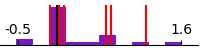
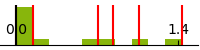
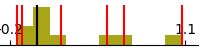
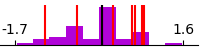
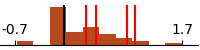
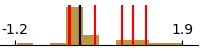
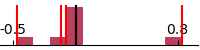
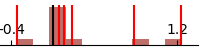
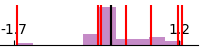
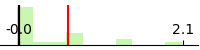
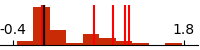
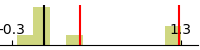
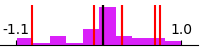
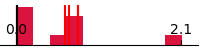
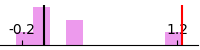
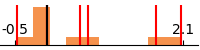
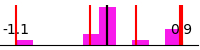
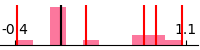
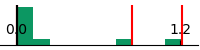
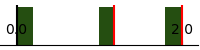
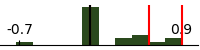
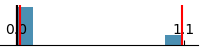
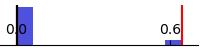
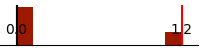
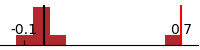
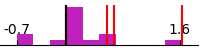
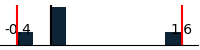
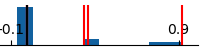
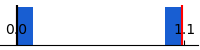
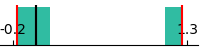
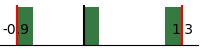
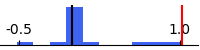
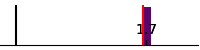
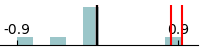
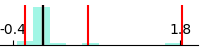
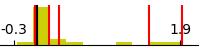
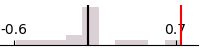
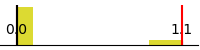
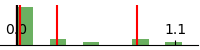
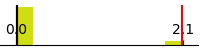
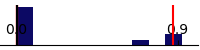
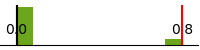
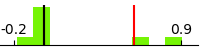
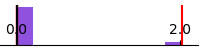
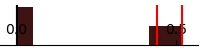
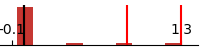
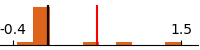
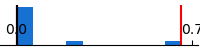
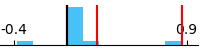
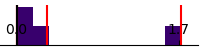
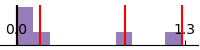
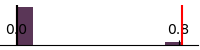
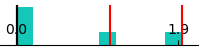
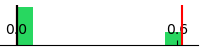
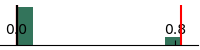
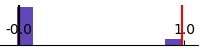
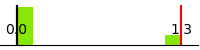
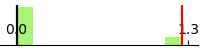
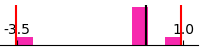
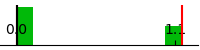
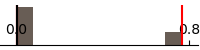
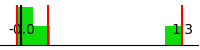
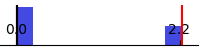
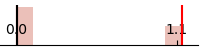
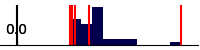
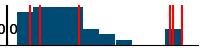
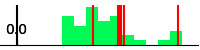
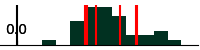
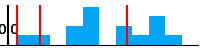
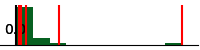
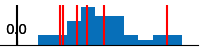
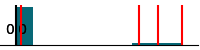
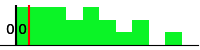
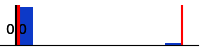
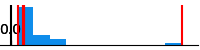
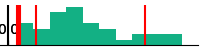
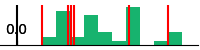
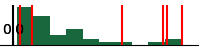
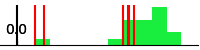
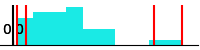
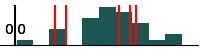
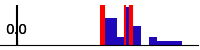
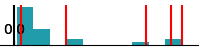
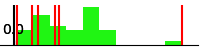
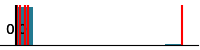
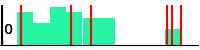
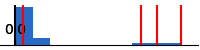
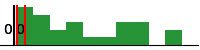
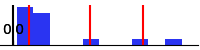
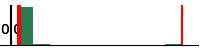
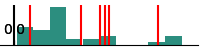
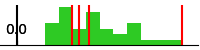
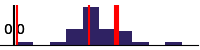
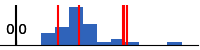
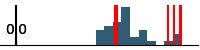
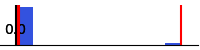
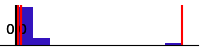
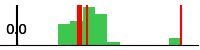
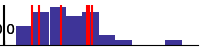
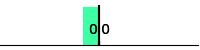
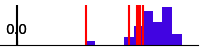
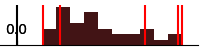
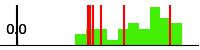
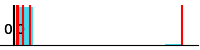
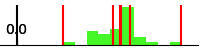
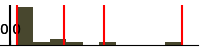
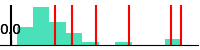
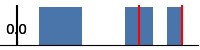
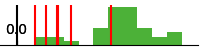
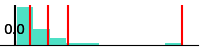
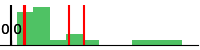
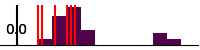
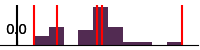
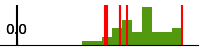
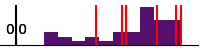
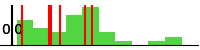
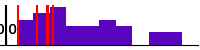
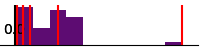
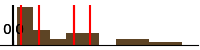
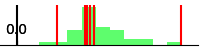
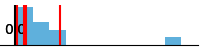
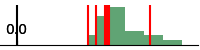
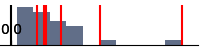
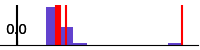
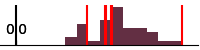
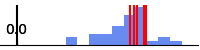
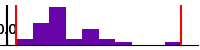
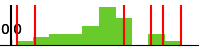
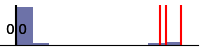
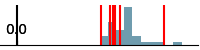
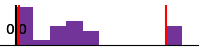
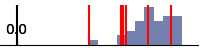
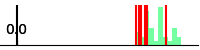
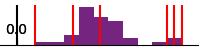
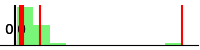
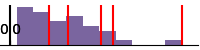
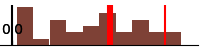
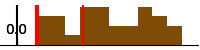
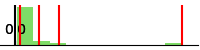
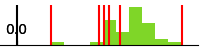
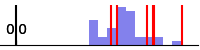
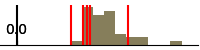
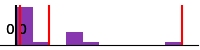
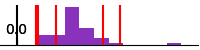
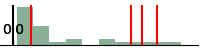
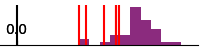
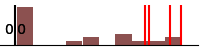
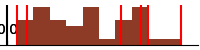
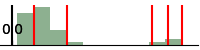
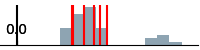
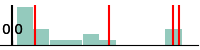
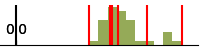
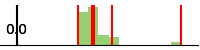
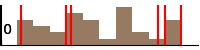
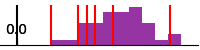
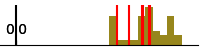
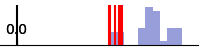
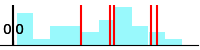
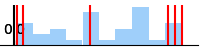
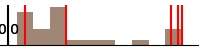
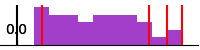
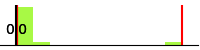
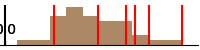
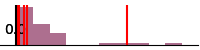
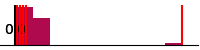
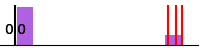
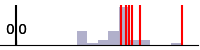
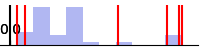
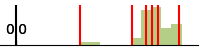
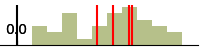
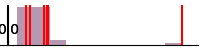
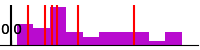
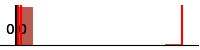
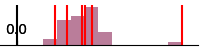
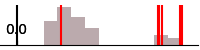
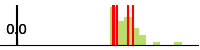
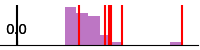
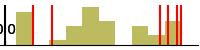
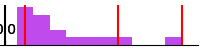
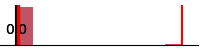
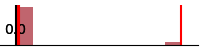
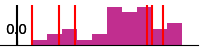
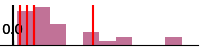
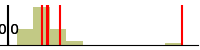
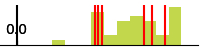
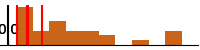
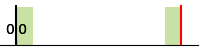
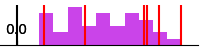
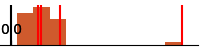
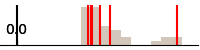
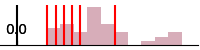
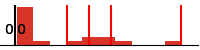
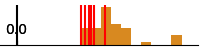
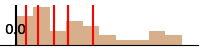
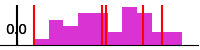
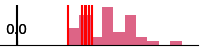
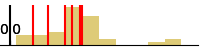
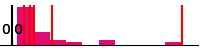
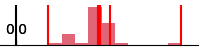
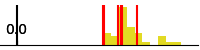
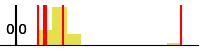
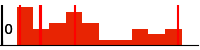
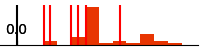
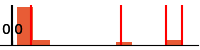
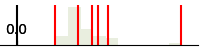
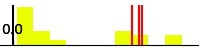
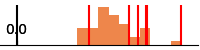
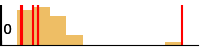
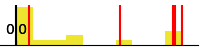
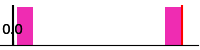
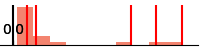
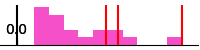
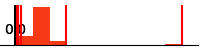
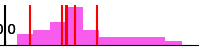
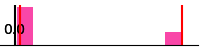
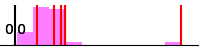
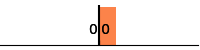
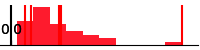
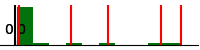
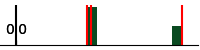
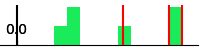
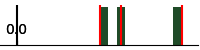
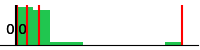
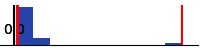
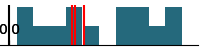
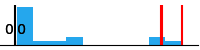
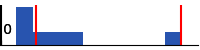
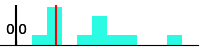
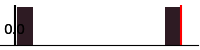
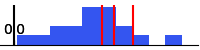
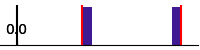
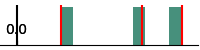
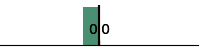
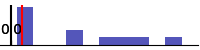
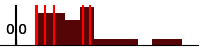
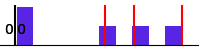
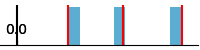
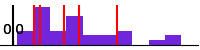
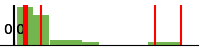
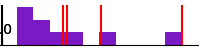
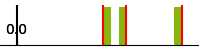
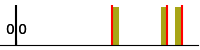
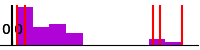
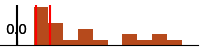
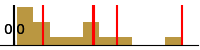
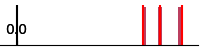
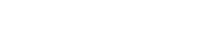
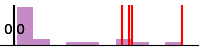
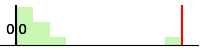
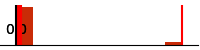
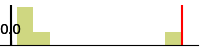
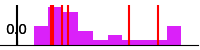
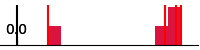
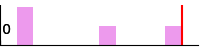
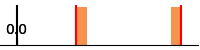
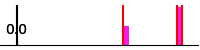
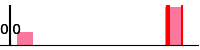
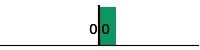
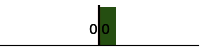
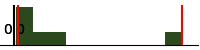
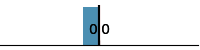
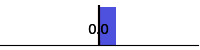
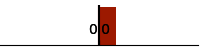
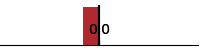
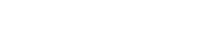
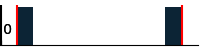
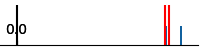
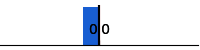
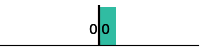
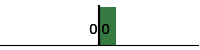
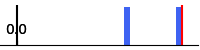
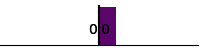
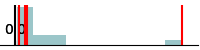
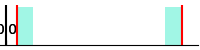
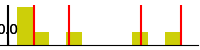
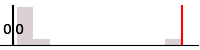
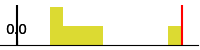
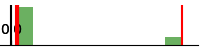
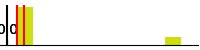
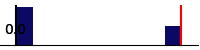
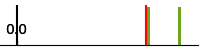
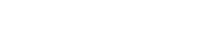
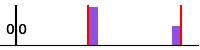
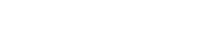
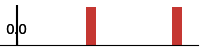
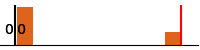
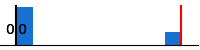
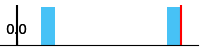
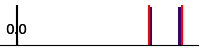
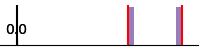
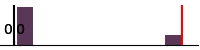
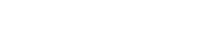
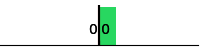
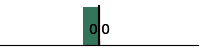
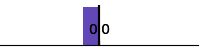
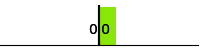
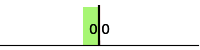
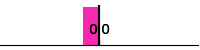
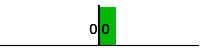
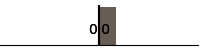
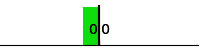
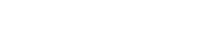
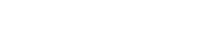
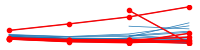
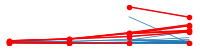
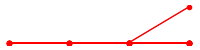
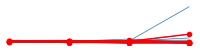
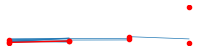
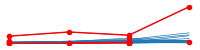
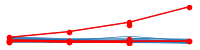
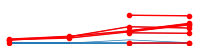
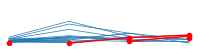
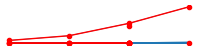
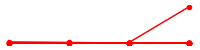
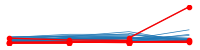
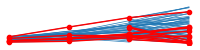
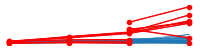
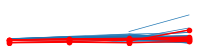
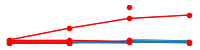
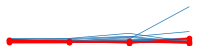
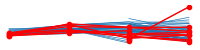
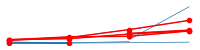
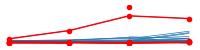
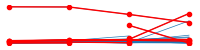
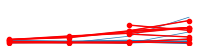
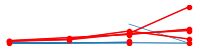
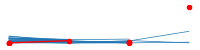
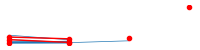
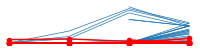
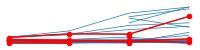
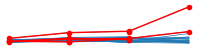
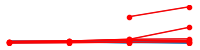
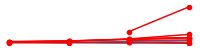
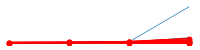
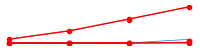
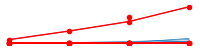
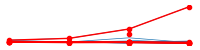
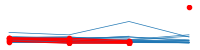
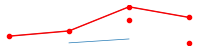
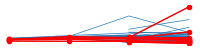
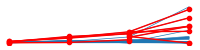
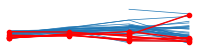
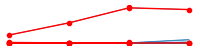
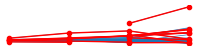
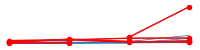
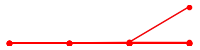
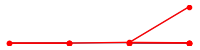
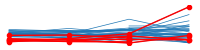
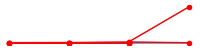
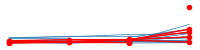
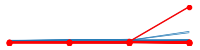
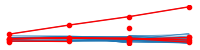
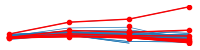
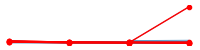
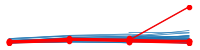
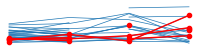
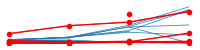
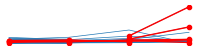
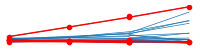
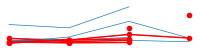
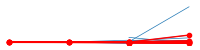
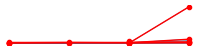
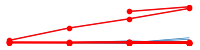
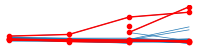
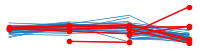
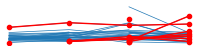
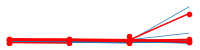
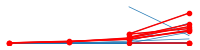
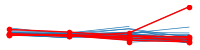
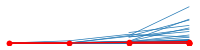
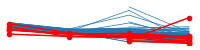
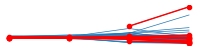
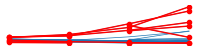
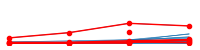
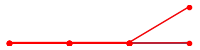
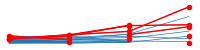
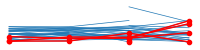
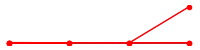
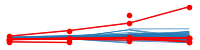
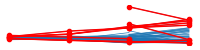
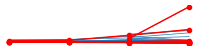
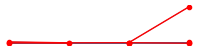
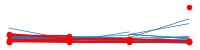
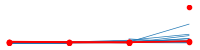
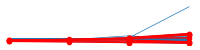
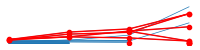
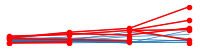
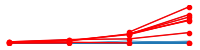
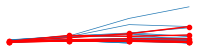
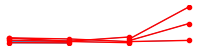
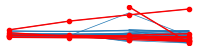
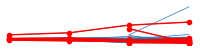
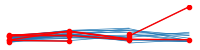
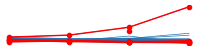
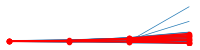
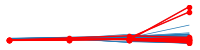
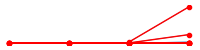
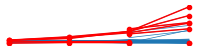
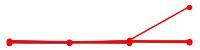
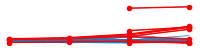
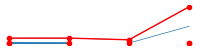
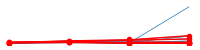
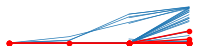
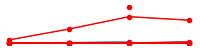
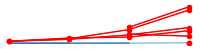
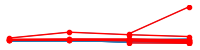
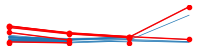
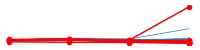
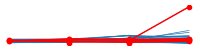
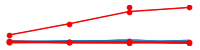
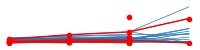
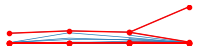
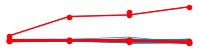
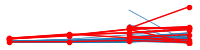
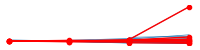
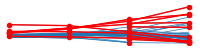
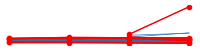
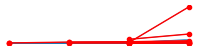
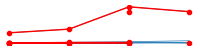
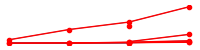
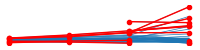
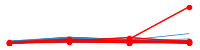
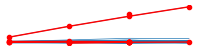
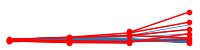
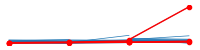
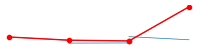
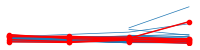
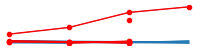
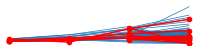
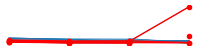
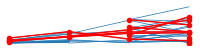
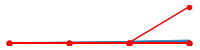
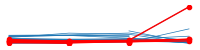
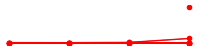
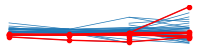
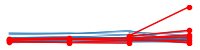
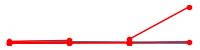
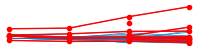
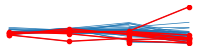
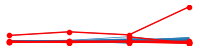
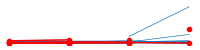
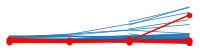
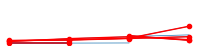
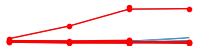
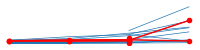
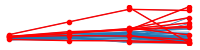
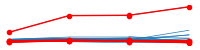
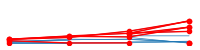
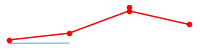
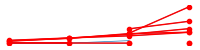
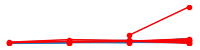
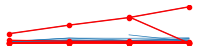
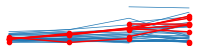
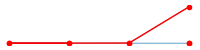
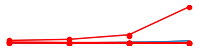
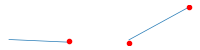
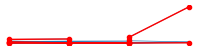
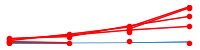
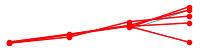
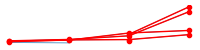
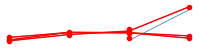
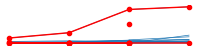
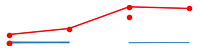
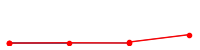
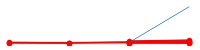
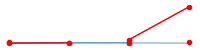
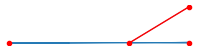
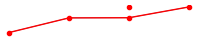
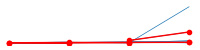
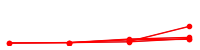
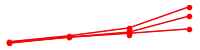
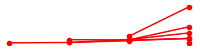
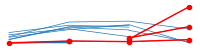
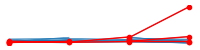
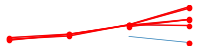
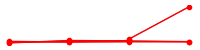
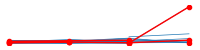
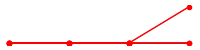
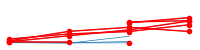
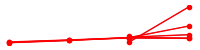
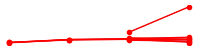
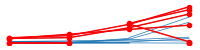
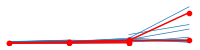
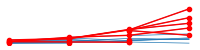
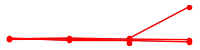
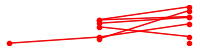
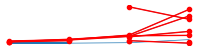
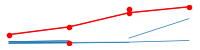
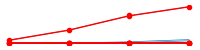
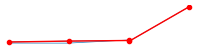
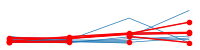
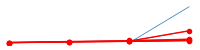
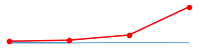
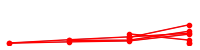
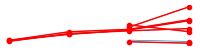
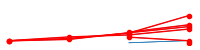
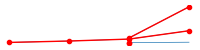
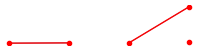
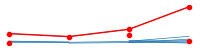
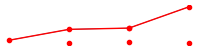
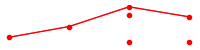
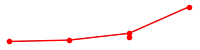
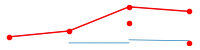
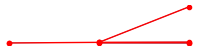
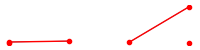
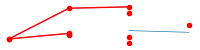
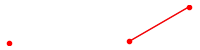
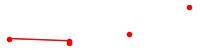
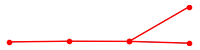
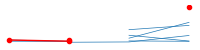
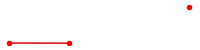
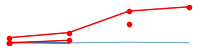
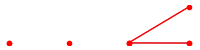
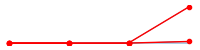
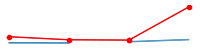
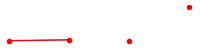
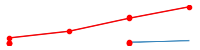
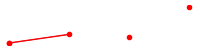
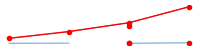
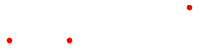
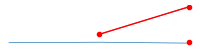
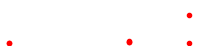
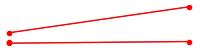
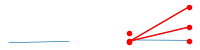
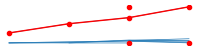
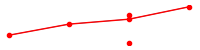
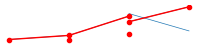
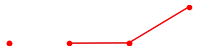
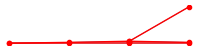
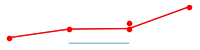
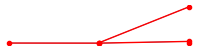
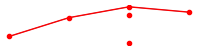
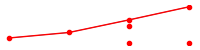
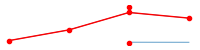
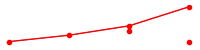
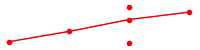
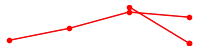
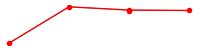
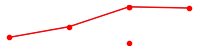
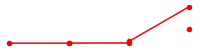
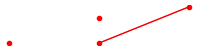
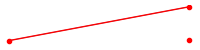
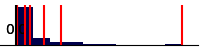
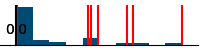
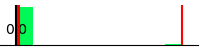
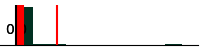
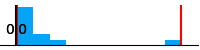
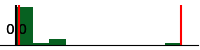
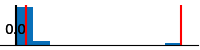
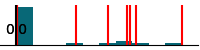
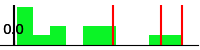
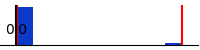
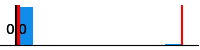
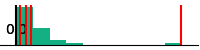
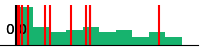
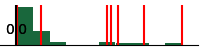
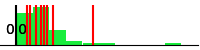
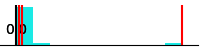
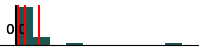
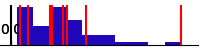
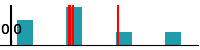
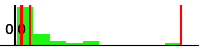
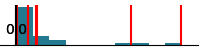
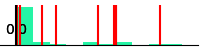
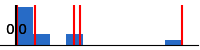
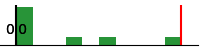
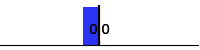
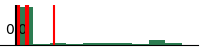
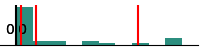
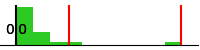
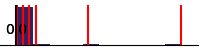
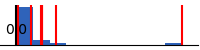
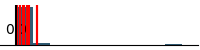
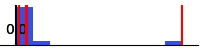
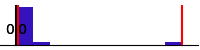
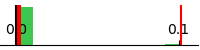
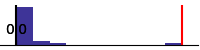
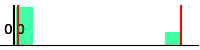
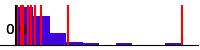
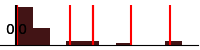
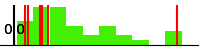
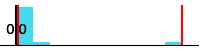
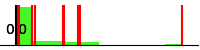
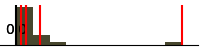
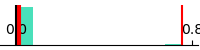
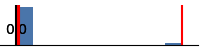
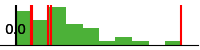
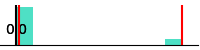
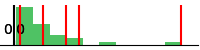
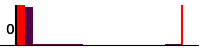
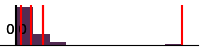
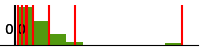
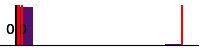
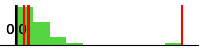
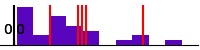
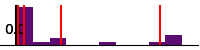
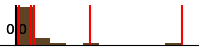
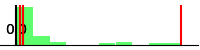
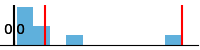
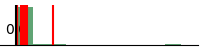
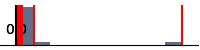
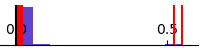
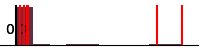
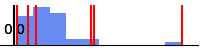
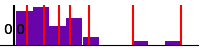
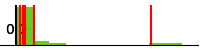
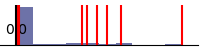
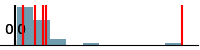
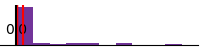
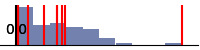
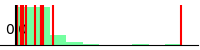
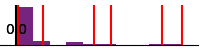
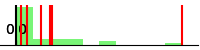
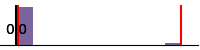
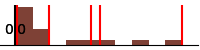
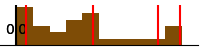
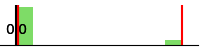
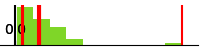
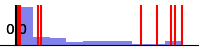
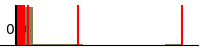
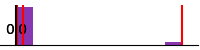
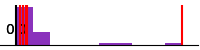
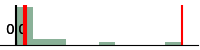
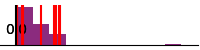
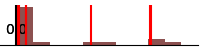
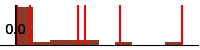
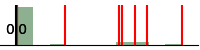
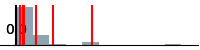
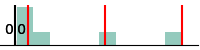
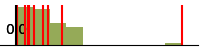
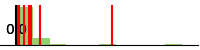
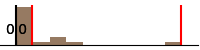
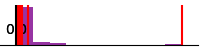
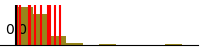
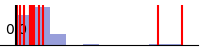
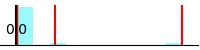
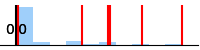
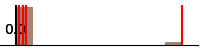
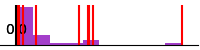
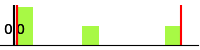
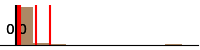
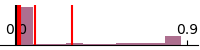
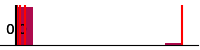
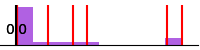
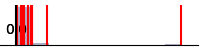
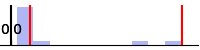
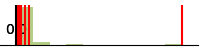
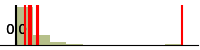
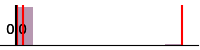
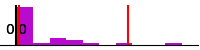
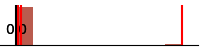
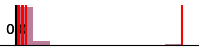
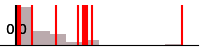
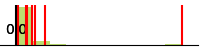
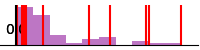
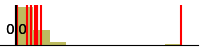
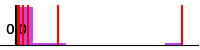
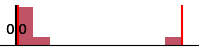
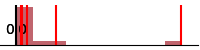
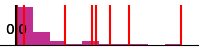
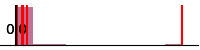
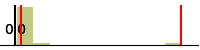
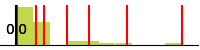
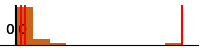
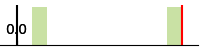
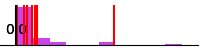
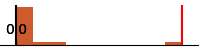
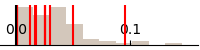
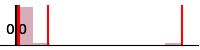
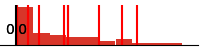
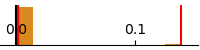
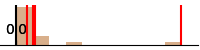
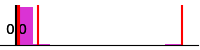
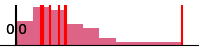
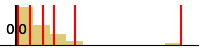
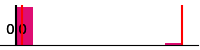
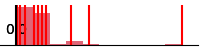
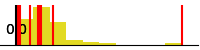
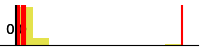
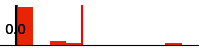
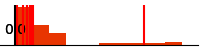
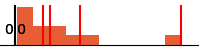
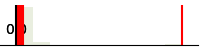
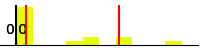
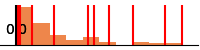
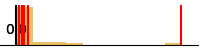
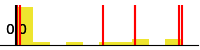
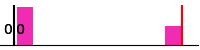
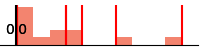
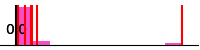
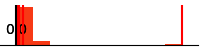
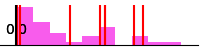
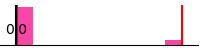
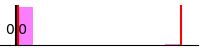
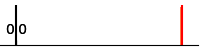
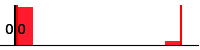
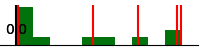
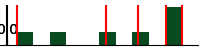
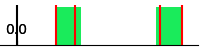
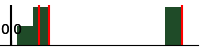
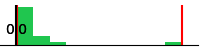
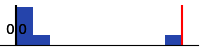
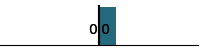
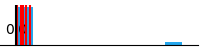
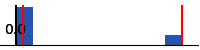
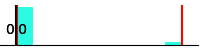
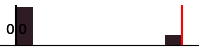
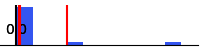
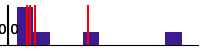
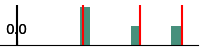
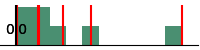
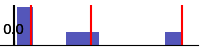
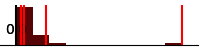
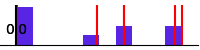
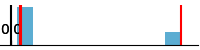
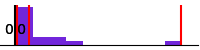
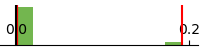
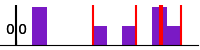
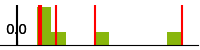
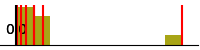
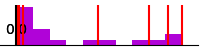
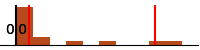
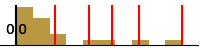
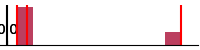
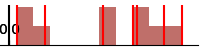
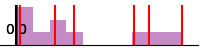
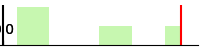
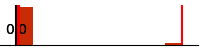
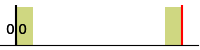
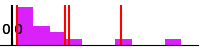
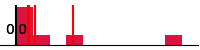
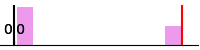
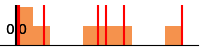
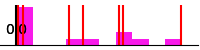
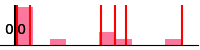
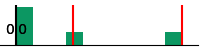
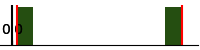
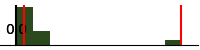
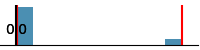
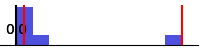
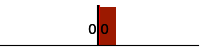
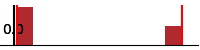
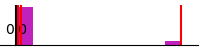
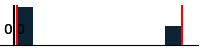
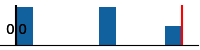
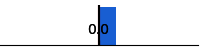
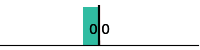
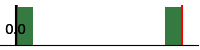
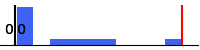
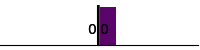
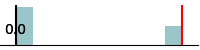
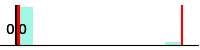
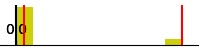
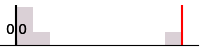
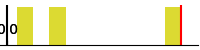
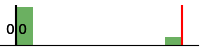
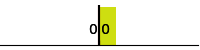
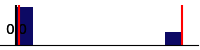
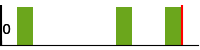
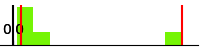
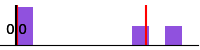
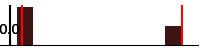
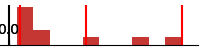
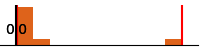
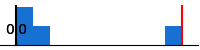
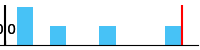
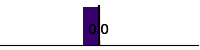
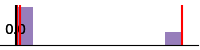
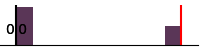
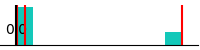
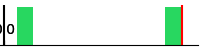
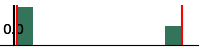
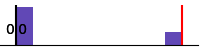
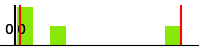
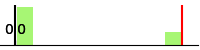
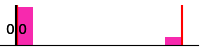
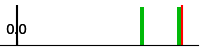
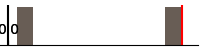
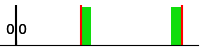
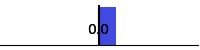
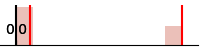

In [15]:
bad_samples_flgEHKL = []
nbseq.viz.dash.selection_group_dashboard(
    ex, starting_phenotype='FlgEHKL', 
    global_query=(
        # consider only samples from sub-experiment '027j'
        "expt == '027j' & io == 'i' & kind == '+'")
)

In [14]:
%debug

> /gpfs/gibbs/project/kazmierczak/cng2/conda_envs/nbseq_full_dev/lib/python3.10/site-packages/h5py/_hl/dataset.py(841)__getitem__()
    839         mspace = h5s.create_simple(selection.mshape)
    840         fspace = selection.id
--> 841         self.id.read(mspace, fspace, arr, mtype, dxpl=self._dxpl)
    842 
    843         # Patch up the output for NumPy



ipdb>  u


> /vast/palmer/home.mccleary/cng2/code/phageseq-paper/panning-extended/h5py/_objects.pyx(55)h5py._objects.with_phil.wrapper()



ipdb>  u


> /vast/palmer/home.mccleary/cng2/code/phageseq-paper/panning-extended/h5py/_objects.pyx(54)h5py._objects.with_phil.wrapper()



ipdb>  u


> /gpfs/gibbs/project/kazmierczak/cng2/conda_envs/nbseq_full_dev/lib/python3.10/site-packages/biom/table.py(4134)axis_load()
   4132             """Loads all the data of the given group"""
   4133             # fetch all of the IDs
-> 4134             ids = grp['ids'][:]
   4135 
   4136             if ids.size > 0:



ipdb>  c


The `vhh_dashboard` examines the behavior of a single feature (e.g. an rVHH) across all selections

In [ ]:
nbseq.viz.dash.vhh_dashboard(ex, 
                             feature='6d72a8720c935bb6bb7cb02e03b5381f<', 
                             global_query="expt == '027j' & kind == '+' & io == 'i'", space='cdr3')

## Picking and resynthesizing rVHHs

Say we have identified several promising CDR3s that we would like to reconstitute as full-length recombinant VHHs. We can use the `nbseq.resynth.Cart` object in `ex.cart` to collect these candidates, review their behavior across all samples, and generate amino acid and nucleic acid sequences to order them

In [ ]:
import pandas as pd
from io import StringIO

df = pd.read_csv(
    StringIO("""CDR3ID	CDR3_mn	Antigen	Interest	pick	Notes
6d72a8720c935bb6bb7cb02e03b5381f	sonata nikita tourist	FlgEHKL	****	1	mean 50x enrichment, enriched in 6 FlgEHKL+ samples, basically all samples where enriched are FlgEHKL+, some FliC+ but not all and most enriched samples were not FliC+
49e0bad9177fcee66f22f56d74511b26	candid alert griffin	FlgEHKL	**	1	only other somewhat good looking one for FlgEHKL…  enriched in 2, dominates 1 sample; rarely enriched elsewhere 
0c97620726c0a010e74c44b1148149ba	ocean invest artist	FlgEHKL	**	1	2 FlgEHKL+ samples, hardly anywhere else
989eda0b48b0c47e024b0ccac3f61248	violet janet block	FlgEHKL	**	1	2* FlgEHKL samples, 2 FlgEHKL+ samples
"""), sep="\t"
)
dff = df.join(nbseq.ft.fortify_features(ex.fts.cdr3), on='CDR3ID').drop('abundance', axis='columns')

ex.cart.add_from_dataframe(dff,description_col='Notes', antigen_col='Antigen')

ex.cart.show_queue(sort=True)

Review the behavior of these candidates across all selections

In [ ]:
ex.cart.visualize_queue()

Generate an amino acid sequence, reverse-transcribe to nucleic acid, and add adapter sequences

In [ ]:
ex.cart.resynthesize()

View a rich report of the resynthesis algorithm

In [ ]:
ex.cart.report_all()

In [ ]:
ex.cart.show_rVHHs(highlight_na=['NA'])